<a href="https://colab.research.google.com/github/Archertakesitez/D3js_repository/blob/main/vis_hw3/ErchiZhang_VisML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**

In this assignment you will use `sklearn` to analyze model performance and `D3.js` to visualize those performance metrics. You can see `D3.js`'s documentation [here](https://d3js.org/).
To run the Javascript code, you can follow the same process of using notebookJS from the last assignment.

If there is code that requires a random seed please set it to RANDOM_STATE variable.

*Do not change* the code in section 1 - it generates the data and trains the model you will be analyzing.

## **1. Setting Up the Classification Model**

First we install and import the necessary libraries:

In [ ]:
# Constants. DO NOT CHANGE.
RANDOM_STATE = 2022

!pip install lime shap notebookjs
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import lime, lime.lime_tabular, shap
from notebookjs import execute_js
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=8e9a4133ecf5048f2462ea9e89de8fbb9a63707254b56834ad6d1b34fd36aca0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### **1.1 [Census Data Set](https://archive.ics.uci.edu/ml/datasets/census+income)**

We will be using a census dataset to predict a person's income (specifically, if they earn more or less than $50,000 per year - this is a binary classification problem) based on a variety of features like age, hours worked per week, education, etc.

First we load and preprocess the dataset (do not change this code):

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

#Removing samples that have no information about nation and occupation
data.drop(data[data['Native_country'] == ' ?'].index, inplace=True)
data.drop(data[data['Occupation'] == ' ?'].index, inplace=True)

X = data.drop(['Income'], axis=1)
y = data['Income']

#Encoding non-numeric features
X = pd.get_dummies(X)

le = LabelEncoder()
y  = le.fit_transform(y)

#Normalizing features
s = MinMaxScaler()
X[X.columns] = s.fit_transform(X[X.columns])

In [ ]:
X.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,...,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,0.293670,0.119671,0.608081,0.010920,0.020288,0.407462,0.031266,0.068532,0.738901,0.035609,...,0.001127,0.003614,0.000365,0.002354,0.001393,0.000564,0.000597,0.911873,0.002122,0.000530
std,0.179930,0.071827,0.169999,0.074065,0.092816,0.122247,0.174037,0.252661,0.439241,0.185316,...,0.033557,0.060008,0.019094,0.048462,0.037291,0.023735,0.024423,0.283484,0.046016,0.023027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.070607,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.111942,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.410959,0.152189,0.800000,0.000000,0.000000,0.448980,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that over 20,000 sample are in class 0 (earn <= 50k per year), while roughly 7,500 samples are in class 1 (earn > 50k per year):

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

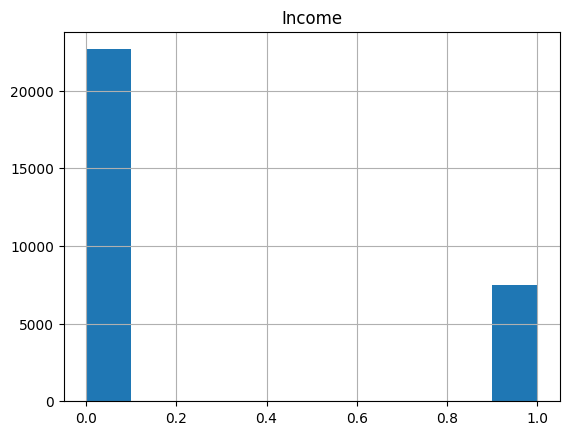

In [ ]:
y_aux = pd.DataFrame(y, columns=["Income"])

# class 0: <=50k
# class 1: >50k
y_aux.hist()

### **1.2 Training Model**

Next, we split our data into train (90%) and test  (10%) sets and train our classifier:

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)

In [ ]:
classifier = MLPClassifier(max_iter=100, random_state=RANDOM_STATE)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, random_state=2022)

In [ ]:
predicted = classifier.predict(X_test)

pre  = precision_score(y_test, predicted)
rec  = recall_score(y_test, predicted)
bacc = balanced_accuracy_score(y_test, predicted)

print("Precision: {:.2f}".format(pre))
print("Recall: {:.2f}".format(rec))
print("Balanced accuracy: {:.2f}".format(bacc))

Precision: 0.72
Recall: 0.68
Balanced accuracy: 0.79


## **2. Explanation**

### **2.1 LIME** (40%)

**(10%)** Train a LIME explainer with X_train subset. Interpret (using explain_instance) the first record of the X_test subset using all features in num_features.

In [ ]:
NUM_FEATURES = len(X_train.columns.values.tolist())
NUM_FEATURES

104

In [ ]:
#Interpretation using all features
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.values.tolist(),
                                                   class_names=['class 0', 'class 1'],
                                                   verbose=True,
                                                   mode='classification',
                                                   random_state=RANDOM_STATE)

lime_values = explainer1.explain_instance(X_test.values[0], classifier.predict_proba, num_features=NUM_FEATURES)

Intercept -5.2606744783762265
Prediction_local [1.09667216]
Right: 0.9969158382777664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
lime_values.show_in_notebook(show_all=False)

**(30%)** Now that you have lime values for the first record of the X_test subset, use notebookJS to plot a D3 bar graph like the one plotted by the LIME show_in_notebook() function. Filter explainer.as_list() and use only: 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'. You should create a separate JS file for your D3 plot code. You can use the same CSS file from the last assignment.


**Interpret your plot in a couple of sentences.**

Note: This [example](https://d3-graph-gallery.com/graph/barplot_horizontal.html) horizontal bar plot is a good starting point for your D3 plot.

In [ ]:
filtered_list = [i for i in lime_values.as_list() if "Age" in i[0] or "Fnlwgt" in i[0]
                 or "Education_num" in i[0] or "Capital_gain" in i[0] or "Capital_loss" in i[0]
                 or "Hours_per_week" in i[0]]
filtered_list

[('Capital_gain > 0.00', 0.6361079611127152),
 ('Capital_loss <= 0.00', -0.13609727187784626),
 ('Hours_per_week <= 0.40', -0.0886802202325435),
 ('0.27 < Age <= 0.41', 0.06924148117253447),
 ('Fnlwgt > 0.15', 0.013098164786399205),
 ('0.60 < Education_num <= 0.80', 0.006592890044440519)]

In [ ]:
data = [{"name":i[0],"value":i[1]} for i in filtered_list]
data

[{'name': 'Capital_gain > 0.00', 'value': 0.6361079611127152},
 {'name': 'Capital_loss <= 0.00', 'value': -0.13609727187784626},
 {'name': 'Hours_per_week <= 0.40', 'value': -0.0886802202325435},
 {'name': '0.27 < Age <= 0.41', 'value': 0.06924148117253447},
 {'name': 'Fnlwgt > 0.15', 'value': 0.013098164786399205},
 {'name': '0.60 < Education_num <= 0.80', 'value': 0.006592890044440519}]

In [ ]:
code_js  = open("Zhang_Erchi_visML_HW3.js", "r").read()
code_css = open("vis01.css","r").read()
d3_path = "https://d3js.org/d3.v7.min.js" #don't change this D3 link

In [ ]:
import random

def python_callback( data ):

  global b
  b = data

  return {'n': random.random(), 'y': 'VisML' }

In [ ]:
#TO DO
execute_js(library_list=[d3_path, code_js],
           main_function="draw_bi_bars",
           css_list=[code_css],
           data_dict={"data":data})

**Plot interpretation:** According to the plot above, we can tell that the this predicted output is most likely to be in class 1, and this is because: the bar for "Capital_gain>0.00" has shown "Capital_gain" has significantly increased the probability that the output is from class 1; "Capital_loss<=0.00" and "Hours_per_week<=0.40" have shown "Capital_loss" and "Hours_per_week" have increased the probability that the output is from class 0, but their impact is not as great as "Capital_gain"; The bars for "Age", "Fnlwgt", and "Education_num" have shown that they have increased the prabability that the output is from class 1, though their impact is relatively minor.  

### **2.2 SHAP** (40%)


**(10%)** Create a SHAP explainer (KernelExplainer) with the classifier and generate the shap values of the X_test subset.

To create the explainer, sample 100 records from the X_train (see shap.sample and use random_state=RANDOM_STATE). To calculate shap_values, select the first 100 records in X_test. This can take a couple of minutes to execute.

In [ ]:
background_sample = shap.sample(X_train, 100, random_state=RANDOM_STATE)#sample 100 records from X_train

In [ ]:
#TO DO
explainer2 = shap.KernelExplainer(classifier.predict_proba,
                                  background_sample)

In [ ]:
X_test_subset = X_test[:100]#get first 100 records in X_test

In [ ]:
shap_values = explainer2.shap_values(X_test_subset)

  0%|          | 0/100 [00:00<?, ?it/s]

**(30%)**
Next, choose two of the features from your LIME plot ('Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week') and use notebookJS and D3 to create a scatter plot like the one plotted by the SHAP function dependence_plot(). You should use the values returned by explainer.shap_values() for class 1 (>50k), and data features from the first 100 records in X_test.

**Interpret your plot in a couple of sentences.**

Note: Refer to [this page](https://observablehq.com/@d3/color-legend) for more information about creating a color legend.

In [ ]:
class_one_shap = shap_values[:,:,1]

In [ ]:
class_one_shap.shape#check shapes match

(100, 104)

In [ ]:
X_test_subset.shape

(100, 104)

I have chosen "Age" and "Fnlwgt" as the two features for the dependence plot. According to SHAP tools, the dependence_plot() generated from the given conditions is shown below:

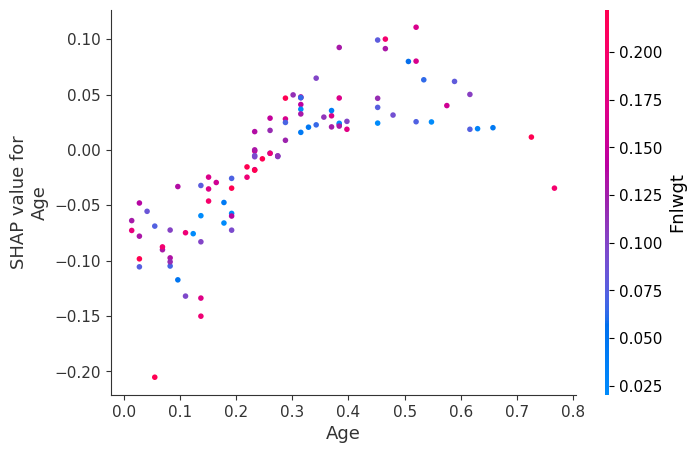

In [ ]:
feature_name = "Age"
interaction  = "Fnlwgt"
shap.dependence_plot(feature_name, class_one_shap, X_test_subset, interaction_index=interaction)

Now we apply notebookJS and D3 to create the similar plot as above:

In [ ]:
#note the index for age is 0 and for Fnlwgt is 1
Age_val = X_test_subset.iloc[:,0].values

In [ ]:
Fnlwgt_val = X_test_subset.iloc[:,1].values

In [ ]:
Age_shap = class_one_shap[:,0]

In [ ]:
data2 = [{"a_val":Age_val[i],"f_val":Fnlwgt_val[i],"s_val":Age_shap[i]} for i in range(0,100)]

In [ ]:
#TO DO
execute_js(library_list=[d3_path, code_js],
           main_function="draw_shap",
           css_list=[code_css],
           data_dict={"data":data2})

**Plot interpretation:** According to this plot, as age increases, the shap value of age tends to increase too, pushing the model's prediction for the output higher than the baseline. Hence, there is a positive relationship between Age and its Shap Value. In terms of observing the color scale, which is the "Fnlwgt" feature, I cannot observe a significant trend between "Age" and "Fnlwgt", so I have to conclude there is no observable dependence between Age and Fnlwgt.

### **3. Reflection Questions (20%)**




1) Why is LIME a good model explainer? (10%)  

2) Choose two types of SHAP plots (e.g. waterfall, beeswarm, dependence, force) and compare and contrast them. What information do they show? In what situations would you choose to use one instead of the other? (10%)

1)LIME has many advantages as a model explainer. LIME's explanation is short and selective, and possibly contrasive (and we can control the sparsity of weight coefficients in the regressions method to make explanations more interpretable). Thus, LIME can be useful in feature selection and feature engineering by highlighting the features that are the most influential ones for predictions. The explanation generated by LIME is designed to be interpretable and is very easy to understand, and therefore we can use LIME to efficiently comprehend complex models. Moreover, LIME can be used with almost any kind of machine learning model, so it is very flexible.

2) I choose to compare and contrast waterfall plot and  dependence plot in SHAP plots. Waterfall plots show how the base value, which is the average model output across the dataset, is adjusted by each features contribution for a single prediction. The bottom of a waterfall plot starts as the base value, and then each row above it shows how the positive and negative contribution of each feature moves the value from the base value until it becomes the model output for this prediction. As a result, the waterfall plot focus on a single prediction and offers insights on how each feature make positive or negative contribution to this specific prediction.
In contrast, the dependence plot, which is the one we drew above, show two things: the effect of a single feature across the entire dataset, which is how the models' prediction output varies with the change in this feature's values, and the interaction between this feature and another selected feature. Hence, while the waterfall plot is showing the effect of multiple features on a single prediction, the dependence plot is showing the effect of a single feature on all predictions as well as the relationship between this single feature and another feature. In terms of their applications, when facing the situations where I need to analyze why a model made a specific prediction, I would prefer the waterfall plot as it offers insight in specific prediction; however, when facing the situations where I need to figure out the interaction between two features, or if I need to know how the changes in one feature would impact the model predictions, I would prefer dependence plot.